# Model Evidence

This is a nice example of using the model evidence framework to quantify the tradeoff between model complexity and 'goodness-of-fit'.

We try to fit polynomials of various degrees to noisy observations of sinusoidal data, and measure the RMSE (a goodness of fit metric) and the log model evidence (see, for example Section 3.5.1 in Bishop's Pattern Recognition and Machine Learning textbook).

Although moving from degree 2 to degree 3 polynomial improves the fit of the model slightly, the evidence for the model is lower - because the extra complexity isn't justified by the improvement in the fit.

With the small amount of data we have, we only have evidence to use a degree 2 polynomial. If the number of data points is increased (to say, 50), then in fact the order 5 polynomial becomes preferred (under the model evidence framework).

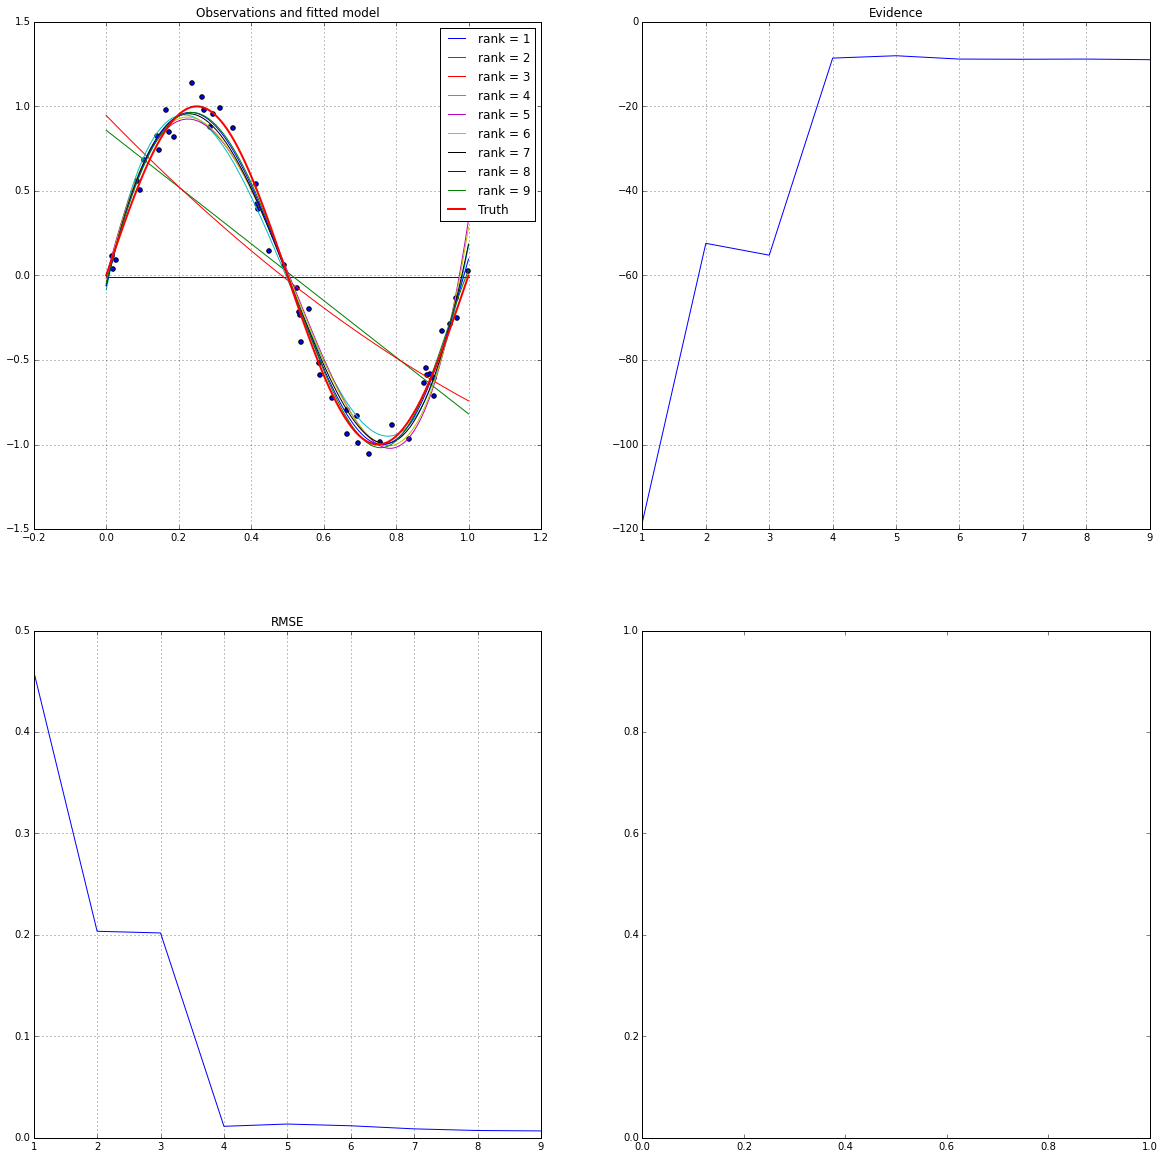

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pylab

pylab.cla ()
pylab.clf ()
np.random.seed (1)

# Try to fit the data with polynomials up to this order
number_of_polynomials = 10

# Fit data on this inerval
interval = (0, 1)

# Observe 100 noisy esimates of the data
num_data_points = 10

# Assume variances are known: 'alpha' the variance of the prior
alpha = 5e-3

# Beta the precision (inverse variance) of the noise of the observations.
beta = 11

def observe ():
    x = np.random.uniform (*interval)
    noise = np.random.normal (0, 1.0 / beta)
    return x, np.sin (2 * np.pi * x) + noise

example_data = map (lambda x : observe (), range (num_data_points))
xs = np.array ([x[0] for x in example_data])
ys = np.array ([x[1] for x in example_data])

truth_x = np.linspace (*interval, num=100)
truth_y = map (lambda x : np.sin (2 * np.pi * x), truth_x)

evidence = []
rmse = []

fig, axes = pylab.subplots (2, 2, figsize=(20, 20))

for rank in range (1, number_of_polynomials):

    phi = np.array ([[x ** n for n in range (rank)] for x in xs])

    phiTphi = np.matmul (np.transpose (phi), phi)

    A = alpha * np.identity (phiTphi.shape[0]) + beta * phiTphi
    mn = beta * np.matmul (np.linalg.solve (A, np.transpose (phi)), ys)
    detA = np.linalg.det (A)
    er = ys - np.matmul (phi, mn)
    Emn = 0.5 * (beta * np.matmul (np.transpose (er), er) + alpha * np.matmul (np.transpose (mn), mn))

    log_evidence = 0.5 * rank * np.log (alpha) \
                   + 0.5 * num_data_points * np.log (beta) \
                   - Emn - 0.5 * np.log (detA) - 0.5 * num_data_points * np.log (2 * np.pi)

    rmse.append (np.nanmean ((np.matmul (mn, np.transpose (phi)) - ys)**2))
    
    evidence.append (log_evidence)
    pylab.sca (axes.ravel ()[0])
    basis = np.array ([[x ** n for n in range (rank)] for x in truth_x])
    pylab.plot (truth_x, np.matmul (mn, np.transpose (basis)), label="rank = {}".format (rank))
    
pylab.sca (axes.ravel ()[0])
pylab.plot (truth_x, truth_y, c='r', linewidth=2, label="Truth")
pylab.legend ()
pylab.scatter (xs, ys)
pylab.grid (True)
pylab.title ("Observations and fitted model")
pylab.sca (axes.ravel ()[1]) 
pylab.plot (range (1, number_of_polynomials), evidence)
pylab.grid (True)
pylab.title ("Evidence")

pylab.sca (axes.ravel ()[2]) 
pylab.plot (range (1, number_of_polynomials), rmse)
pylab.grid (True)
pylab.title ("RMSE")
pylab.show()